<a href="https://colab.research.google.com/github/cagBRT/Data/blob/main/Outliers_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/are-outliers-harder-to-predict-ae84dd4be465

Outliers are individuals that are very different from the majority of the population. Traditionally, among practitioners there is a certain mistrust in outliers, this is why ad-hoc measures such as removing them from the dataset are often adopted.

Sometimes, they are even more important than other observations! Take for instance the case of individuals that are outliers because they are very high-paying customers: you don’t want to discard them, actually, you probably want to treat them with extra care.

Is an ML model more likely to make mistakes when making predictions on outliers?



To sum up, we may imagine three possibilities:

outliers are harder to predict;
outliers are easier to predict;
outliers are neither harder nor easier to predict.


In [ ]:
!pip install pycaret --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.1 MB/s e

In [ ]:
import numpy as np
import pandas as pd
from pycaret.datasets import get_data
from scipy.stats import percentileofscore
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.ensemble import IsolationForest
from category_encoders import CatBoostEncoder
from lightgbm import LGBMClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
DATASET_NAMES = [ "bank", "blood", "cancer", "credit", "diabetes", "electrical_grid",
                 "employee", "heart", "heart_disease", "hepatitis", "income", "juice",
                 "nba", "wine", "telescope", "titanic", "us_presidential_election_results"]

In [ ]:
def get_dataset(dataset_name):
  """Get dataset."""
  target_name = datasets.loc[datasets["Dataset"]==dataset_name, "Target Variable 1"]
  df = get_data(dataset_name, verbose=False)
  X, y = df.drop(target_name, axis=1), df[target_name]
  y = y.replace({yval: binval for yval, binval in zip(y.value_counts().index, [0,1])}).iloc[:,0]
  num_features = X.columns[X.apply(is_numeric)].tolist()
  cat_features = [c for c in X.columns if c not in num_features]
  return X, y, num_features, cat_features

def is_numeric(x):
  """Check whether an object is numeric."""
  try:
    x+0
    return True
  except:
    return False

def individual_log_loss(y_true, y_pred, eps=1e-15):
  """Compute log-loss for each individual of the sample."""
  y_pred = np.clip(y_pred, eps, 1 - eps)
  return - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)

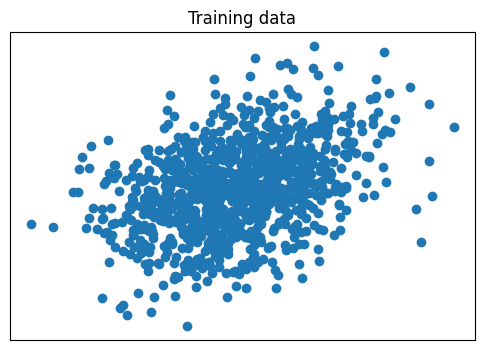

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
x = np.random.multivariate_normal([0,0], [[1,.6],[.6,2]], size=1000)
ax.scatter(x[:,0], x[:,1])
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Training data")
fig.savefig(f"example_training.png", dpi=200, bbox_inches="tight")

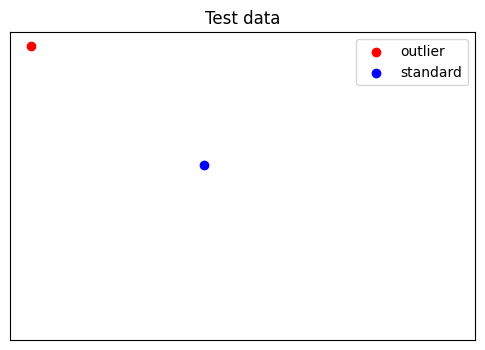

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x[:,0], x[:,1], color="white")
ax.scatter(np.min(x, axis=0)[0], np.max(x, axis=0)[1], color="red", label="outlier")
ax.scatter(np.quantile(x, q=.3, axis=0)[0], np.quantile(x, q=.7, axis=0)[1], color="blue", label="standard")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Test data")
ax.legend(loc="upper right")
fig.savefig(f"example_test.png", dpi=200, bbox_inches="tight")

In [ ]:
datasets = get_data(verbose=False)

"bank": https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification<br>

"telescope": https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [ ]:
dataset_name = "bank"
X, y, num_features, cat_features = get_dataset(dataset_name)
X_train, X_test, y_train, y_test = train_test_split(X, y)
if len(cat_features) > 0:
  cat_encoder = CatBoostEncoder().fit(X_train[cat_features].fillna("NULL"), y_train)
  X_train[cat_features] = cat_encoder.transform(X_train[cat_features])
  X_test[cat_features] = cat_encoder.transform(X_test[cat_features])
  X_train = X_train.fillna(X_train.mean())
  X_test = X_test.fillna(X_train.mean())
  iforest = IsolationForest(n_estimators = 100).fit(X_train)
  iforest_scores_test = pd.Series(-iforest.score_samples(X_test), index=X_test.index)
  model = LGBMClassifier(verbose=-1).fit(X_train, y_train)
  pred_test = pd.Series(model.predict_proba(X_test)[:,1], index=X_test.index)
  logloss_test = individual_log_loss(y_test, pred_test)

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [ ]:
id = iforest_scores_test.sort_values().tail(1).index[0]
x = X_train.apply(lambda col: percentileofscore(col, X_test.loc[id, col.name])).sort_values(key=lambda x: np.abs(50-x), ascending=False).rename("quantile") / 100
out = pd.concat([ X.loc[id, x.index].rename("original data"), x ], axis=1).round(2)
out[(out["quantile"] > .95) | (out["quantile"] < .05)]

,original data,quantile
pdays,466,1.00
job,student,0.99
poutcome,success,0.98
month,sep,0.98


In [ ]:
pd.concat([iforest_scores_test.rename("outlierness_test"), logloss_test.rename("logloss_test")], axis=1).head()

,outlierness_test,logloss_test
11283,0.475134,0.000266
30793,0.421250,0.073860
31922,0.385321,0.072312
10570,0.404708,0.007551
13335,0.371119,0.000544


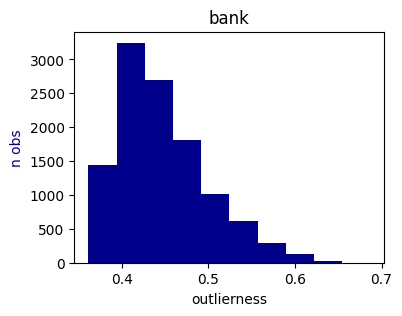

In [ ]:
fig, ax1 = plt.subplots(figsize=(4,3))
ax1.hist(iforest_scores_test, color="darkblue")
ax1.set_title(dataset_name)
ax1.set_xlabel("outlierness")
ax1.set_ylabel("n obs", color="darkblue")
fig.savefig(f"{dataset_name}_hist.png", dpi=200, bbox_inches="tight")

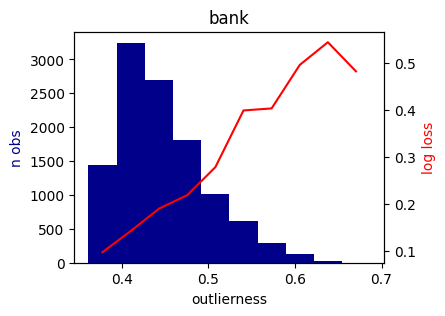

In [ ]:
cut=pd.cut(iforest_scores_test, bins=10)
logloss = logloss_test.groupby(cut).mean()
fig, ax1 = plt.subplots(figsize=(4,3))
ax2 = ax1.twinx()
ax1.hist(iforest_scores_test, color="darkblue")
ax2.plot([i.mid for i in logloss.index], logloss, color="red")
ax1.set_title(dataset_name)
ax1.set_xlabel("outlierness")
ax1.set_ylabel("n obs", color="darkblue")
ax2.set_ylabel("log loss", color="red")
fig.savefig(f"{dataset_name}_hist_logloss.png", dpi=200, bbox_inches="tight")

Repeat for different datasets

In [ ]:
dataset_names = []
for dataset_name in DATASET_NAMES:
  X, y, num_features, cat_features = get_dataset(dataset_name)
  if len(X) > 5000: dataset_names.append(dataset_name)

In [ ]:
results = []
for dataset_name in tqdm(dataset_names):
  X, y, num_features, cat_features = get_dataset(dataset_name)
  for iteration in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    if len(cat_features) > 0:
       cat_encoder = CatBoostEncoder().fit(X_train[cat_features].fillna("NULL"), y_train)
       X_train[cat_features] = cat_encoder.transform(X_train[cat_features])
       X_test[cat_features] = cat_encoder.transform(X_test[cat_features])
       X_train = X_train.fillna(X_train.mean())
       X_test = X_test.fillna(X_train.mean())
       iforest = IsolationForest(n_estimators = 100).fit(X_train)
       iforest_scores_test = pd.Series(-iforest.score_samples(X_test), index=X_test.index)
       model = LGBMClassifier(verbose=-1).fit(X_train, y_train)
       pred_test = pd.Series(model.predict_proba(X_test)[:,1], index=X_test.index)
       logloss_test = individual_log_loss(y_test, pred_test)
       iforest_q95 = iforest_scores_test.quantile(.95)
       outliers_vs_rest = (iforest_scores_test > iforest_q95).replace({True: "outliers", False: "rest"})
       logloss = logloss_test.groupby(outliers_vs_rest).mean()
       results.append({ "dataset name": dataset_name, "iteration": iteration, "n outliers": (iforest_scores_test > iforest_q95).sum(), "log-loss": logloss.mean(), "log-loss (outliers)": logloss["outliers"], "log-loss (rest)": logloss["rest"] })

100%|██████████| 7/7 [00:24<00:00,  3.50s/it]


In [ ]:
results_agg = pd.DataFrame(results).groupby("dataset name").agg({ "dataset name": lambda x: x.values[0], "iteration": lambda x: len(x), "n outliers": np.min, "log-loss": np.mean, "log-loss (outliers)": np.mean, "log-loss (rest)": np.mean, })
results_agg["ratio"] = np.maximum(results_agg["log-loss (outliers)"], results_agg["log-loss (rest)"]) / np.minimum(results_agg["log-loss (outliers)"], results_agg["log-loss (rest)"])
results_agg = results_agg.sort_values("ratio", ascending=False)

In [ ]:
results_agg.loc[:,["log-loss","log-loss (outliers)","log-loss (rest)"]].round(3).style.apply(lambda x: ["background: red" if (v > results_agg["log-loss"].iloc[e] and x.name =="log-loss (outliers)") else ("background: lightgreen"
                                                                                                                                                                                                               if x.name=="log-loss (outliers)" else "") for e, v in enumerate(x)])

,log-loss,log-loss (outliers),log-loss (rest)
dataset name,,,
employee,0.035000,0.020000,0.051000
bank,0.303000,0.427000,0.180000
income,0.256000,0.231000,0.281000
